<a href="https://colab.research.google.com/github/Marcin19721205/MachineLearingBootCampPartII/blob/main/14_local_outlier_factor_MJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję `0.22.1`

### Spis treści:
1. [Import bibliotek](#0)
2. [Wygenerowanie danych](#1)
3. [Wizualizacja danych](#2)
4. [Algorytm K-średnich](#3)
5. [Wizualizacja klastrów](#4)




### <a name='0'></a> Import bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
import plotly.express as px
import plotly.graph_objects as go

sns.set(font_scale=1.2)
np.random.seed(10)

### <a name='1'></a> Wygenerowanie danych

In [24]:
data = make_blobs(n_samples=3000, cluster_std=2.0, random_state=10)[0]
data[:5]

array([[ 5.3225064 ,  3.47478502],
       [ 1.13839312,  2.6245458 ],
       [ 5.94747158, -9.18860118],
       [ 7.12009544, -9.2716575 ],
       [ 2.7743283 ,  4.25698184]])

### <a name='2'></a> Wizualizacja danych

In [25]:
tmp = pd.DataFrame(data=data, columns=['x1', 'x2'])
px.scatter(tmp, x='x1', y='x2', width=950, title='Local Outlier Factor', template='plotly_dark')

In [26]:
fig = go.Figure()
fig1 = px.density_heatmap(tmp, x='x1', y='x2', width=700, title='Outliers', nbinsx=20, nbinsy=20)
fig2 = px.scatter(tmp, x='x1', y='x2', width=700, title='Outliers', opacity=0.5)

fig.add_trace(fig1['data'][0])
fig.add_trace(fig2['data'][0])
fig.update_traces(marker=dict(size=4, line=dict(width=2, color='white')), selector=dict(mode='markers'))
fig.update_layout(template='plotly_dark', width=950)
fig.show()

/tmp/ipython-input-1361590603.py:2: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



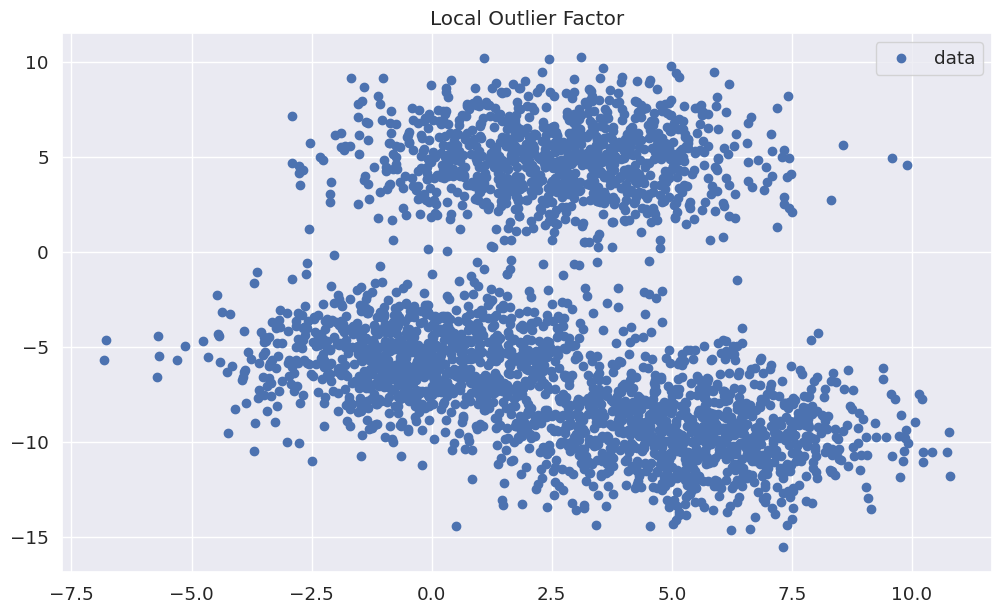

In [27]:
plt.figure(figsize=(12, 7))
plt.scatter(data[:, 0], data[:, 1], label='data', cmap='tab10')
plt.title('Local Outlier Factor')
plt.legend()
plt.show()

In [31]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=40)
y_pred = lof.fit_predict(data)
y_pred[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [32]:
all_data = np.c_[data, y_pred]
all_data[:5]

array([[ 5.3225064 ,  3.47478502,  1.        ],
       [ 1.13839312,  2.6245458 ,  1.        ],
       [ 5.94747158, -9.18860118,  1.        ],
       [ 7.12009544, -9.2716575 ,  1.        ],
       [ 2.7743283 ,  4.25698184,  1.        ]])

In [33]:
tmp['y_pred'] = y_pred
px.scatter(tmp, x='x1', y='x2', color='y_pred', width=950,
           title='Local Outlier Factor', template='plotly_dark')

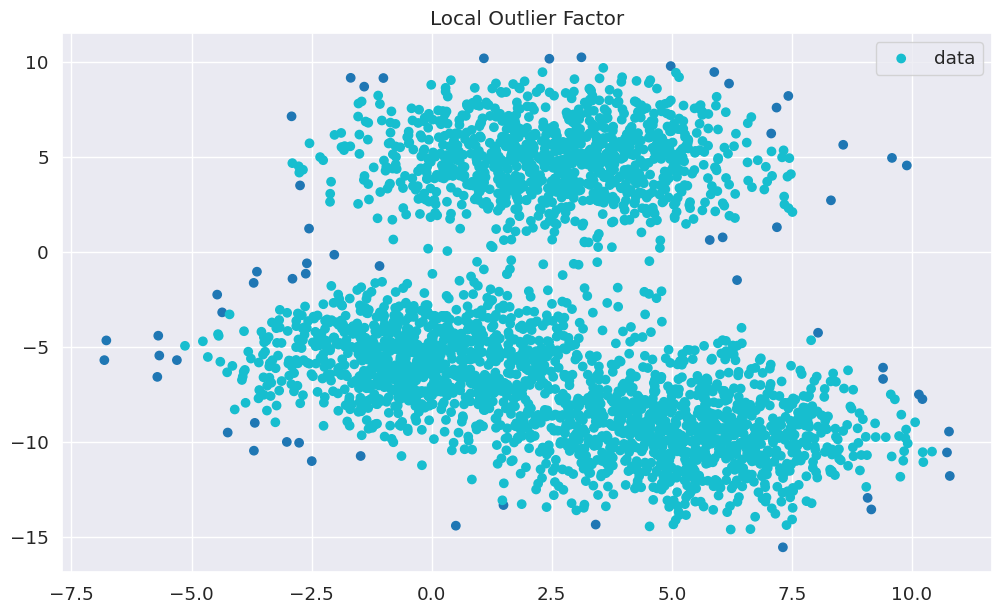

In [34]:
plt.figure(figsize=(12, 7))
plt.scatter(all_data[:, 0], all_data[:, 1], c=all_data[:, 2], cmap='tab10', label='data')
plt.title('Local Outlier Factor')
plt.legend()
plt.show()

In [35]:
LOF_scores = lof.negative_outlier_factor_
radius = (LOF_scores.max() - LOF_scores) / (LOF_scores.max() - LOF_scores.min())
radius[:5]

array([0.07100662, 0.08825728, 0.00961234, 0.02144223, 0.02357313])

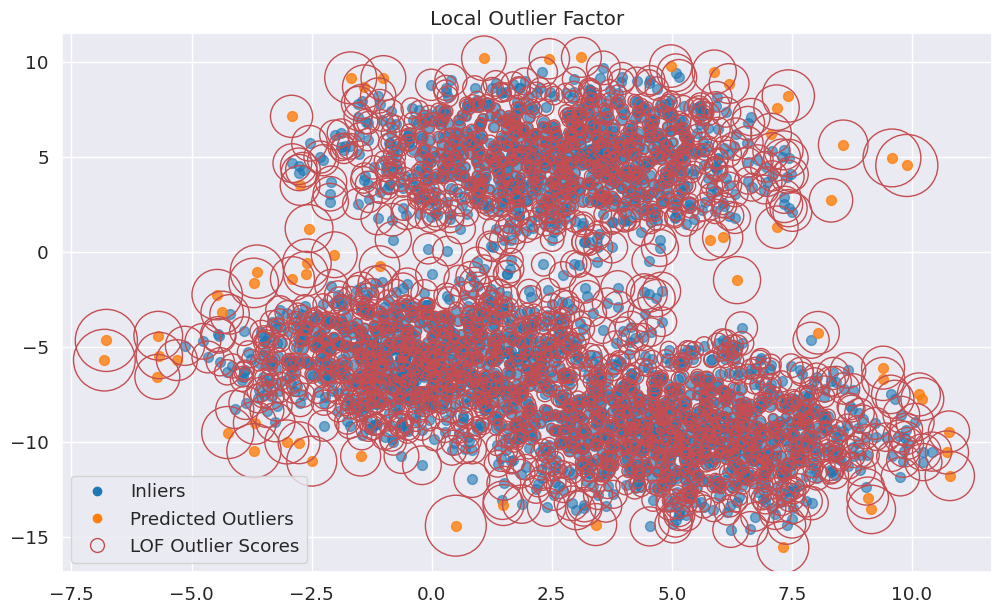

In [38]:
import matplotlib.collections as mcollections
import matplotlib.lines as mlines

plt.figure(figsize=(12, 7))

# Separate inliers and outliers based on y_pred
inliers = all_data[all_data[:, 2] == 1] # y_pred = 1 for inliers
outliers = all_data[all_data[:, 2] == -1] # y_pred = -1 for outliers

# Plot inliers with a distinct color
plt.scatter(inliers[:, 0], inliers[:, 1], c='tab:blue', label='Inliers', s=50, alpha=0.6)

# Plot actual outliers (from y_pred) with a distinct color
plt.scatter(outliers[:, 0], outliers[:, 1], c='tab:orange', label='Predicted Outliers', s=50, alpha=0.8)

# Plot the LOF 'outlier scores' as red circles
s2 = plt.scatter(all_data[:, 0], all_data[:, 1], s=2000 * radius, edgecolors='r', facecolors='none', label='LOF Outlier Scores')

plt.title('Local Outlier Factor')

# Create proxy artists for the legend entries
proxy_inliers = mlines.Line2D([], [], color='tab:blue', marker='o', linestyle='None',
                               markersize=6, label='Inliers')
proxy_predicted_outliers = mlines.Line2D([], [], color='tab:orange', marker='o', linestyle='None',
                                           markersize=6, label='Predicted Outliers')
proxy_lof_scores = mlines.Line2D([], [], color='r', marker='o', linestyle='None',
                                   markersize=10, markeredgecolor='r', markerfacecolor='none',
                                   label='LOF Outlier Scores')

# Create the legend using the proxy artists
plt.legend(handles=[proxy_inliers, proxy_predicted_outliers, proxy_lof_scores])

plt.show()

AttributeError: 'Legend' object has no attribute 'legendHandles'

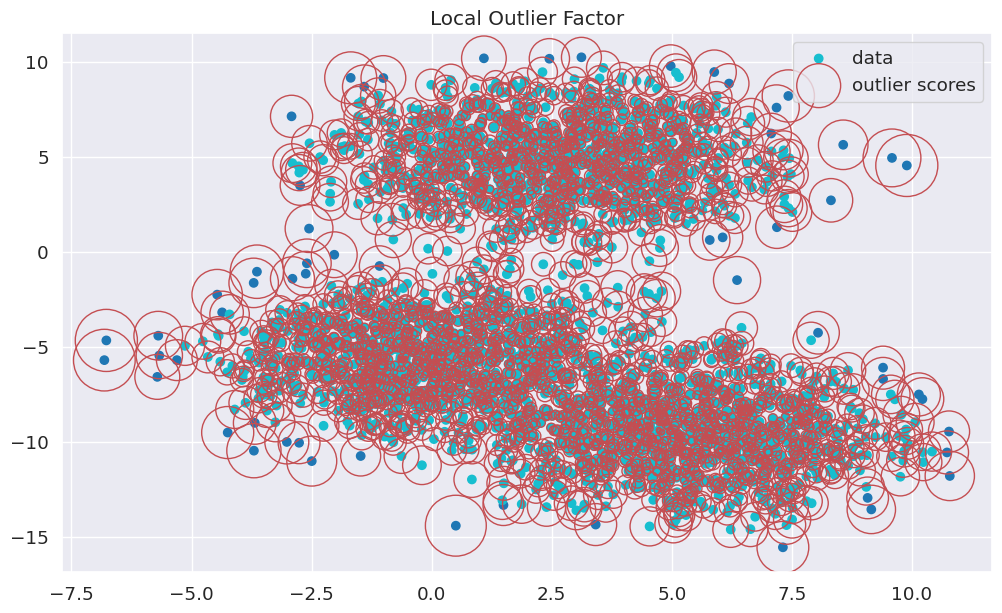

In [40]:
plt.figure(figsize=(12, 7))
plt.scatter(all_data[:, 0], all_data[:, 1], c=all_data[:, 2], cmap='tab10', label='data')
plt.scatter(all_data[:, 0], all_data[:, 1], s=2000 * radius, edgecolors='r', facecolors='none', label='outlier scores')
plt.title('Local Outlier Factor')
legend = plt.legend()
legend.legendHandles[1]._sizes = [40]
plt.show()